In [2]:
# imports 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
import seaborn as sns
import ruptures as rpt


In [3]:
def convertDF(path): 
    '''converting a dataframe to a new datafrom with float, 5 decimal places and '''

    # reading in file, and skipping top row
    df = pd.read_csv(path, skiprows=1)

    # defining the titles of the rows
    body_loc = df.columns.tolist()

    # creating new empty dataframe
    df_new = pd.DataFrame()


    for part in body_loc:
        if part == 'bodyparts' or '.2' in part:
            continue
        else:
            df_new[part] = pd.to_numeric(df[part].iloc[1:], errors='coerce').dropna().round(5).astype(float)


    return df_new

In [4]:
convertDF(r'X:\RadcliffeE\for_MorganHampton_BoettcherScholar\Subject Case Data\IO_03_09_2023_RSTN\Processed DLC\csv folder\20230309_b1_d0p4_session001_frontCam-0000DLC_resnet50_IO_2023-03-09_v1Jul26shuffle1_100000.csv')

,PalmBase,PalmBase.1,MCP1,MCP1.1,MCP2,MCP2.1,MCP3,MCP3.1,MCP4,MCP4.1,...,fTip4,fTip4.1,fTip5,fTip5.1,MidForeArm,MidForeArm.1,Elbow,Elbow.1,MidUpperArm,MidUpperArm.1
1,427.68420,525.04236,410.07465,512.46381,422.62207,512.34229,431.66183,515.87225,433.84598,521.71631,...,431.01334,524.16760,430.32056,533.31592,403.50226,498.96652,428.74121,521.85260,413.70947,508.22092
2,427.55515,525.52698,416.32242,519.02728,422.38318,512.05750,432.13925,515.85297,433.90189,523.97223,...,431.21808,523.53918,429.74142,533.03680,403.92142,498.57404,428.34988,521.21143,413.91519,508.15848
3,428.83749,525.09314,416.42743,514.66742,426.05865,513.35712,433.23996,515.40753,434.10300,520.83276,...,431.66458,523.39935,436.46527,533.51062,403.67477,499.32172,429.20349,521.05377,421.22336,511.42886
4,427.64291,525.92279,416.71466,518.57947,425.62653,513.52405,433.05511,515.44293,434.36728,523.24493,...,433.69006,510.82559,435.76471,533.62976,403.82156,498.84067,427.55899,520.01587,421.07886,510.67938
5,426.92892,527.05646,416.20743,519.60193,425.37756,513.96991,433.56567,515.88367,435.39407,524.12006,...,430.02274,524.09430,435.45032,534.02930,403.57819,499.19968,426.80386,521.10657,427.26505,519.75195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4254,409.27893,529.51117,402.01764,512.64917,419.35519,505.83731,433.84900,509.25037,442.25943,515.05127,...,437.06381,537.88745,437.47852,537.07068,399.36777,498.08112,404.47647,510.55844,404.61240,507.07516
4255,410.21484,528.43250,402.41074,512.63715,419.33099,505.77332,434.20978,508.96127,442.24612,514.95874,...,436.91302,537.72119,437.57880,536.73492,399.50476,497.88647,404.35373,510.64697,404.78781,507.02295
4256,409.49408,529.20630,402.52710,512.88135,419.25885,505.88922,433.54303,509.36148,441.58258,515.35126,...,471.11996,517.30737,436.38293,537.08301,399.65521,498.39529,404.72327,510.47168,413.33014,512.70062
4257,409.30777,529.09454,402.19760,512.87628,418.84924,506.24756,433.41946,509.68869,442.31934,515.36176,...,471.52716,517.42834,469.67038,520.89050,399.34567,498.01099,404.98578,510.48285,411.86682,519.94336


In [5]:
# defining my path to pt one
IO_03_09_2023_RSTN = Path(r'X:\RadcliffeE\for_MorganHampton_BoettcherScholar\Subject Case Data\IO_03_09_2023_RSTN\Processed DLC\csv folder')

# list of all the videos for this specific patient (c1s is missing for this patient)
dbs_loc = ['b1f', 'b1s', 'b2f', 'b2s', 'b3f', 'b3s', 'c1f', 'c1s', 'c2s', 'c3f', 'c3s', 't1f', 't1s', 't2f', 't2s', 't3f', 't3s']

# place to store all the df
dataframes = {}

files = list(IO_03_09_2023_RSTN.iterdir())

# iterating over each file for pt 1 and converting the df to floats and cleaning up the data
for file, label in zip(IO_03_09_2023_RSTN.iterdir(), dbs_loc):
    dataframes[label] = convertDF(file)
    print(f"{label} loaded from {file.name}")


b1f loaded from 20230309_b1_d0p4_session001_frontCam-0000DLC_resnet50_IO_2023-03-09_v1Jul26shuffle1_100000.csv
b1s loaded from 20230309_b1_d0p4_session001_sideCam-0000DLC_resnet50_IO_2023-03-09_v1Jul26shuffle1_100000.csv
b2f loaded from 20230309_b2_d0p4_session001_frontCam-0000DLC_resnet50_IO_2023-03-09_v1Jul26shuffle1_100000.csv
b2s loaded from 20230309_b2_d0p4_session001_sideCam-0000DLC_resnet50_IO_2023-03-09_v1Jul26shuffle1_100000.csv
b3f loaded from 20230309_b3_d0p4_session001_frontCam-0000DLC_resnet50_IO_2023-03-09_v1Jul26shuffle1_100000.csv
b3s loaded from 20230309_b3_d0p4_session001_sideCam-0000DLC_resnet50_IO_2023-03-09_v1Jul26shuffle1_100000.csv
c1f loaded from 20230309_c1_d2p0_session001_sideCam-0000DLC_resnet50_IO_2023-03-09_v1Jul26shuffle1_100000.csv
c1s loaded from 20230309_c2_d2p0_session001_frontCam-0000DLC_resnet50_IO_2023-03-09_v1Jul26shuffle1_100000.csv
c2s loaded from 20230309_c2_d2p0_session001_sideCam-0000DLC_resnet50_IO_2023-03-09_v1Jul26shuffle1_100000.csv
c3f lo

In [6]:
import pandas as pd
import ruptures as rpt

# Initialize an empty dictionary to hold results by base label
results_dict = {}

for df_name, data in dataframes.items():
    # Extract base label (e.g. 'b1' from 'b1f' or 'b1s')
    base_label = df_name[:-1]  # remove last character
    view = 'front' if df_name.endswith('f') else 'side'

    points = data['MCP1.1']
    points_np = points.to_numpy()

    algo = rpt.Pelt(model='l2').fit(points_np)
    change_points = algo.predict(pen=1e6)

    # Initialize dict entry if not exists
    if base_label not in results_dict:
        results_dict[base_label] = {'front': None, 'side': None}

    # Save change points in proper column
    results_dict[base_label][view] = change_points

# Convert dictionary to DataFrame
df_indices = pd.DataFrame.from_dict(results_dict, orient='index').reset_index()
df_indices.rename(columns={'index': 'dataset'}, inplace=True)


In [7]:
df_indices['front_length'] = df_indices['front'].apply(lambda x: len(x) if isinstance(x, list) else 0)

In [8]:
df_indices

,dataset,front,side,front_length
0,b1,"[1745, 2515, 3210, 4010, 4258]","[725, 765, 1210, 1265, 2800, 3510, 4556]",5
1,b2,"[400, 1345, 2155, 2960, 3271]","[335, 1345, 2155, 2945, 2985, 3223]",5
2,b3,"[345, 1255, 2065, 2845, 3053]","[1200, 1960, 2750, 2790, 2947]",5
3,c1,"[690, 1480, 2280, 3465, 4595, 4635, 4936]","[500, 1300, 1975, 2720, 3013]",7
4,c2,None,"[495, 1375, 2160, 3219]",0
5,c3,"[565, 1365, 2325, 3105, 3368]","[570, 1365, 2370, 3268]",5
6,t1,[619],[622],1
7,t2,[498],"[340, 465, 522]",1
8,t3,"[305, 1320, 2175, 2400, 3110, 3575]","[1315, 2195, 2280, 3075, 3200, 3300, 3531]",6


In [9]:
success_list = []

for _, row in df_indices.iterrows():
    # Check if number of change points in 'front' view is 4, 5, or 6
    num_cp = len(row['front']) if isinstance(row['front'], list) else 0

    if num_cp in [4, 5, 6]:
        success_list.append(f"{row['dataset']}f")
    else:
        success_list.append(f"{row['dataset']}s")

print(success_list)


['b1f', 'b2f', 'b3f', 'c1s', 'c2s', 'c3f', 't1s', 't2s', 't3f']


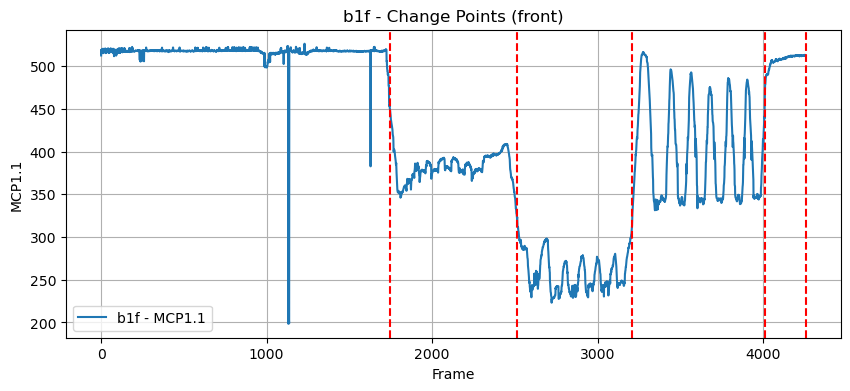

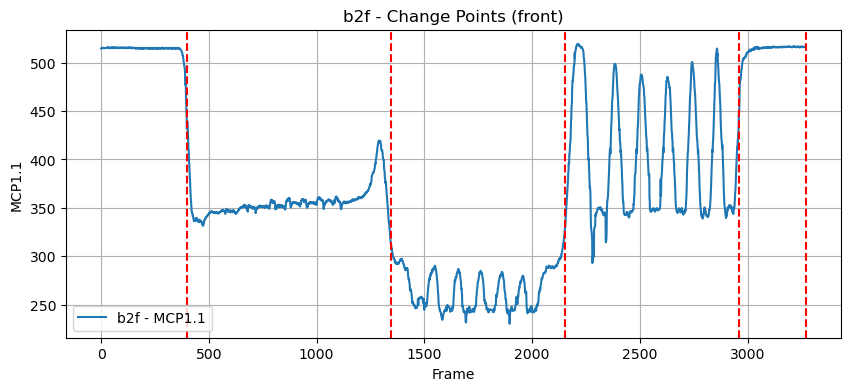

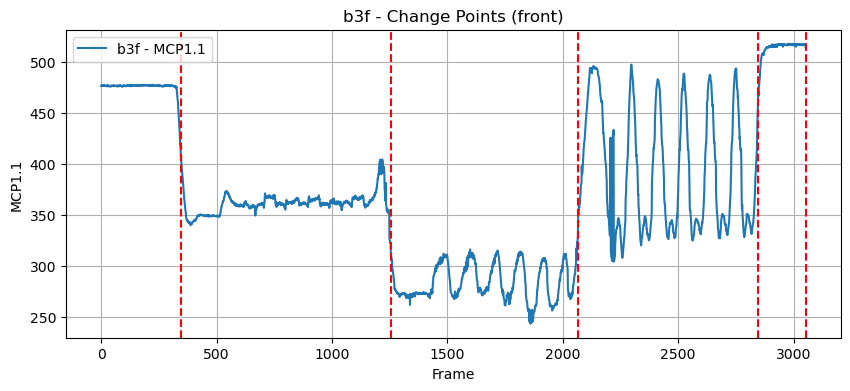

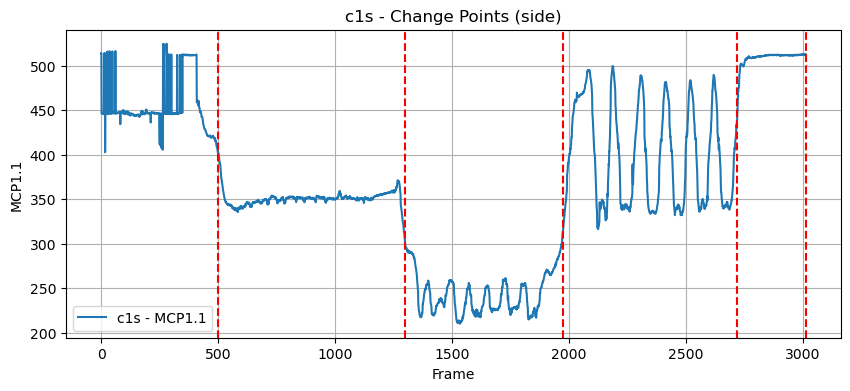

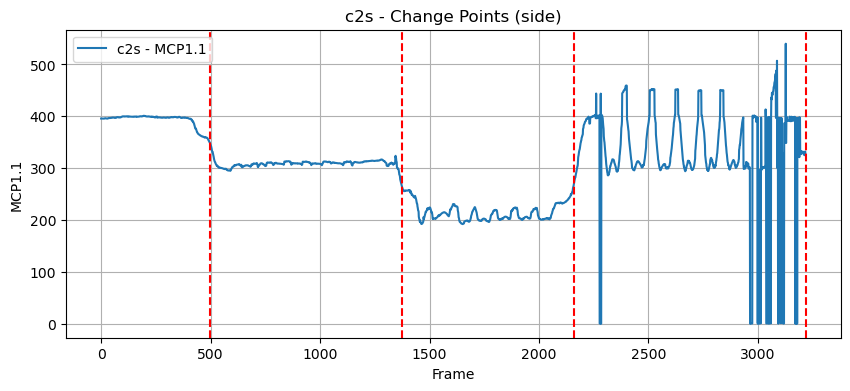

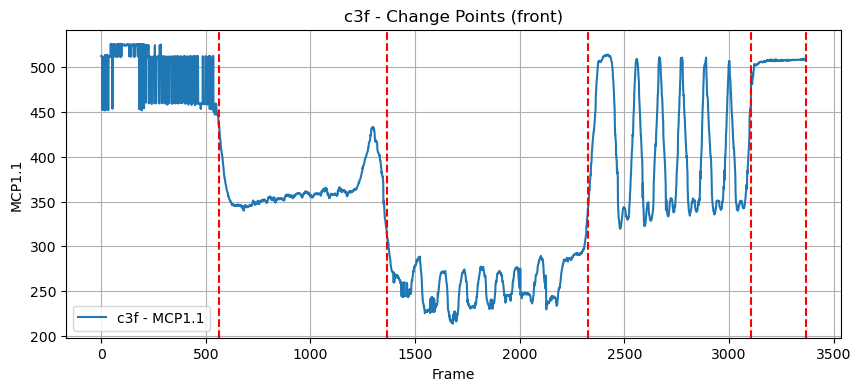

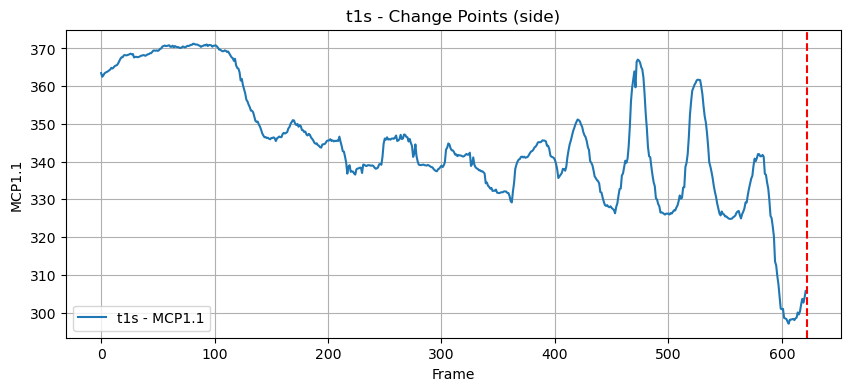

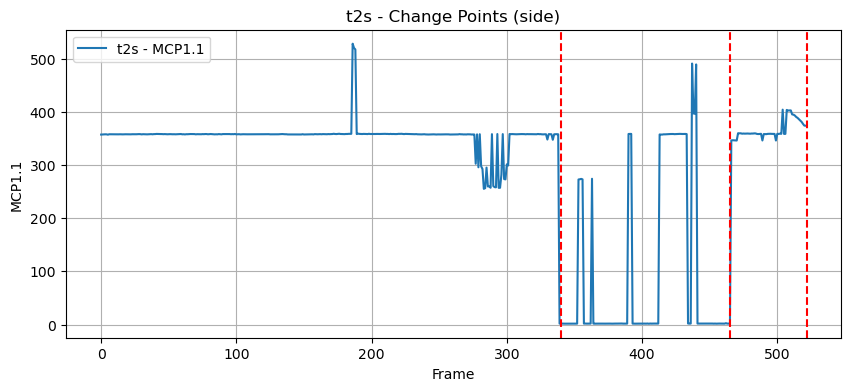

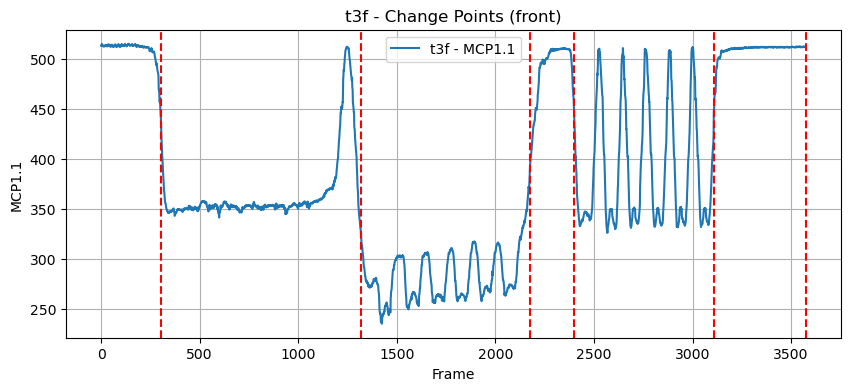

In [10]:
for name in success_list:
    base_name = name[:-1]  # e.g., 'b1' from 'b1f'
    view = 'front' if name.endswith('f') else 'side'

    # 1. Pull the signal from the correct DataFrame
    df = dataframes[name]
    signal = df['MCP1.1'].to_numpy()
    time = np.arange(len(signal))

    # 2. Get the change points for this dataset and view
    row = df_indices[df_indices['dataset'] == base_name]
    if not row.empty:
        change_points = row.iloc[0][view]
    else:
        change_points = []

    # 3. Plot the signal and overlay change points
    plt.figure(figsize=(10, 4))
    plt.plot(time, signal, label=f'{name} - MCP1.1')
    
    # Plot vertical lines at change points
    for cp in change_points:
        plt.axvline(cp, color='red', linestyle='--')

    plt.title(f"{name} - Change Points ({view})")
    plt.xlabel("Frame")
    plt.ylabel("MCP1.1")
    plt.grid(True)
    plt.legend()
    plt.show()


In [12]:
# Create empty DataFrame to hold results
columns = ['dataset', 'view', 'movement', 'data', 'time', 'indices']
df_movements = pd.DataFrame(columns=columns)

for name in success_list:
    base_name = name[:-1]               # 'b1' from 'b1f'
    view = 'front' if name.endswith('f') else 'side'
    
    # 1. Get signal and time
    df = dataframes[name]
    x = df['MCP1.1'].to_numpy()
    t = df.index.to_numpy() if 'time' not in df else df['time'].to_numpy()

    # 2. Get change points
    row = df_indices[df_indices['dataset'] == base_name]
    if row.empty:
        continue  # skip if no match

    change_points = row.iloc[0][view]
    if len(change_points) < 3:
        continue  # not enough points to split into 3 parts

    # 3. Define movement segments
    segment_info = {
        'hand_OC': (change_points[0], change_points[1]),
        'hand_PS': (change_points[1], change_points[2]),
        'arm_EF': (change_points[2], len(x))  # to end
    }

    for movement, (start, end) in segment_info.items():
        if end - start < 400:
            continue  # skip short segments

        segment_data = x[start:end]
        segment_time = t[start:end]

        df_movements = pd.concat([
            df_movements,
            pd.DataFrame([{
                'dataset': base_name,
                'view': view,
                'movement': movement,
                'data': segment_data,
                'time': segment_time,
                'indices': (start, end)
            }])
        ], ignore_index=True)

# preview result
df_movements.head()


,dataset,view,movement,data,time,indices
0,b1,front,hand_OC,"[450.00656, 448.0502, 445.30121, 443.25018, 44...","[1746, 1747, 1748, 1749, 1750, 1751, 1752, 175...","(1745, 2515)"
1,b1,front,hand_PS,"[317.83844, 312.74094, 311.93942, 311.05396, 3...","[2516, 2517, 2518, 2519, 2520, 2521, 2522, 252...","(2515, 3210)"
2,b1,front,arm_EF,"[327.45755, 330.77271, 334.17511, 337.41238, 3...","[3211, 3212, 3213, 3214, 3215, 3216, 3217, 321...","(3210, 4258)"
3,b2,front,hand_OC,"[439.14294, 439.14536, 432.31442, 423.14078, 4...","[401, 402, 403, 404, 405, 406, 407, 408, 409, ...","(400, 1345)"
4,b2,front,hand_PS,"[311.82791, 312.01193, 310.13269, 306.78973, 3...","[1346, 1347, 1348, 1349, 1350, 1351, 1352, 135...","(1345, 2155)"
